# Visualize Analog Forecasts

Run the analog forecast algorithm using the cell below, then visualize results.

In [1]:
%%time
from analog_forecast import find_analogs, make_forecast
from config import data_dir

varname = input("Variable name: ") or "t2m"
spatial_domain = input("Spatial domain: ") or "alaska"
ref_date = input("Reference date (YYYY-mm-dd): ") or "2021-07-01"

analogs = find_analogs(varname, ref_date, spatial_domain, data_dir, 16)
forecast = make_forecast(analogs, varname, ref_date, spatial_domain, data_dir)

Variable name:  sst
Spatial domain:  panarctic
Reference date (YYYY-mm-dd):  2019-03-27


<xarray.DataArray 'sst' (time: 21999)>
array([0.16906323, 0.17814334, 0.18702134, ..., 5.35562   , 5.3657894 ,
       5.3727274 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2019-03-25T12:00:00 ... 2016-08-06T12:00:00
   Top 5 Analogs: 
Rank 1:   Date: 2019-03-25;  RMSE: 0.169
Rank 2:   Date: 2015-01-21;  RMSE: 0.342
Rank 3:   Date: 2018-04-18;  RMSE: 0.359
Rank 4:   Date: 2016-03-26;  RMSE: 0.369
Rank 5:   Date: 2014-01-28;  RMSE: 0.382
CPU times: user 56.9 s, sys: 40.2 s, total: 1min 37s
Wall time: 1min 35s


### Observed - Predicted:

In [7]:
import luts
import xarray as xr
import panel.widgets as pnw
import hvplot.xarray # noqa



# get the bbox for composite mean/"forecast"
bbox = luts.spatial_domains[spatial_domain]["bbox"]

# get filepath to data file used
fp = data_dir.joinpath(luts.varnames_lu[varname]["filename"])

with xr.open_dataset(fp) as ds:
    ds = ds.sel(
        latitude=slice(bbox[3], bbox[1]),
        longitude=slice(bbox[0], bbox[2])
    )
    err = ds[varname].sel(time=forecast.time.values) - forecast
    err.name = "error"
    
time = pnw.Player(name="time", start=0, end=13, loop_policy="loop", interval=1000)
err_hv = err.interactive(loc="bottom").isel(time=time)
err_hv.hvplot(cmap="RdBu_r", invert=True, clabel="Error (Observed - Predicted)").opts(width=800, height=500)

## RMSE for forecast

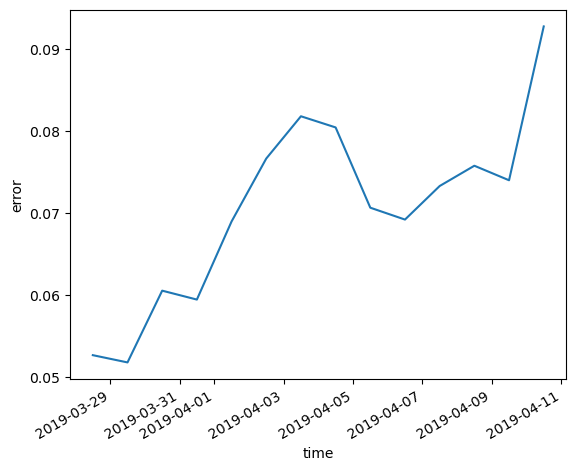

In [9]:
(err ** 2).mean(axis=(1, 2)).plot()